In [4]:
import pandas as pd
df=pd.read_csv('/home/ubuntu/project/mayang/Classification/process_data/job/job_train_8935.csv')
df.head()

,Unnamed: 0,query,index,c0,c1,t0,t1,error,improvement,query_plan_no_index,query_plan_index
0,0,"SELECT MIN(cn.name) AS producing_company,\n ...",['I(C kind_type.id)'],291570.2,291570.06,3390.761,3170.545,-0.064945,0.064946,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy..."
1,1,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C kind_type.id)', 'I(C company_type.id,C c...",291570.2,291569.93,3390.761,3089.979,-0.088705,0.088706,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy..."
2,2,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C kind_type.id)', 'I(C movie_companies.mov...",291570.2,257832.09,3390.761,2971.284,-0.008000,0.123712,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy..."
3,3,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C kind_type.id)', 'I(C company_name.id)']",291570.2,291451.62,3390.761,3093.552,-0.087246,0.087653,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy..."
4,4,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C movie_info.movie_id)', 'I(C kind_type.id)']",291570.2,52973.77,3390.761,802.612,0.055021,0.763294,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy..."


In [6]:
df['label'] = df['improvement']
df.loc[df['label'] < 0, 'label'] = 0
df.head()

,Unnamed: 0,query,index,c0,c1,t0,t1,error,improvement,query_plan_no_index,query_plan_index,label
0,0,"SELECT MIN(cn.name) AS producing_company,\n ...",['I(C kind_type.id)'],291570.2,291570.06,3390.761,3170.545,-0.064945,0.064946,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",0.064946
1,1,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C kind_type.id)', 'I(C company_type.id,C c...",291570.2,291569.93,3390.761,3089.979,-0.088705,0.088706,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",0.088706
2,2,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C kind_type.id)', 'I(C movie_companies.mov...",291570.2,257832.09,3390.761,2971.284,-0.008000,0.123712,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",0.123712
3,3,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C kind_type.id)', 'I(C company_name.id)']",291570.2,291451.62,3390.761,3093.552,-0.087246,0.087653,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",0.087653
4,4,"SELECT MIN(cn.name) AS producing_company,\n ...","['I(C movie_info.movie_id)', 'I(C kind_type.id)']",291570.2,52973.77,3390.761,802.612,0.055021,0.763294,"[{'Plan': {'Node Type': 'Aggregate', 'Strategy...","[{'Plan': {'Node Type': 'Aggregate', 'Strategy...",0.763294


In [7]:
df.iloc[:,1:].to_csv('/home/ubuntu/project/mayang/Classification/process_data/job/job_train_8935.csv')

In [12]:
print(df['query'].values[0])

SELECT MIN(cn.name) AS producing_company,
       MIN(miidx.info) AS rating,
       MIN(t.title) AS movie_about_winning
FROM company_name AS cn,
     company_type AS ct,
     info_type AS it,
     info_type AS it2,
     kind_type AS kt,
     movie_companies AS mc,
     movie_info AS mi,
     movie_info_idx AS miidx,
     title AS t
WHERE cn.country_code ='[us]'
  AND ct.kind ='production companies'
  AND it.info ='rating'
  AND it2.info ='release dates'
  AND kt.kind ='movie'
  AND t.title != ''
  AND (t.title LIKE '%Champion%'
       OR t.title LIKE '%Loser%')
  AND mi.movie_id = t.id
  AND it2.id = mi.info_type_id
  AND kt.id = t.kind_id
  AND mc.movie_id = t.id
  AND cn.id = mc.company_id
  AND ct.id = mc.company_type_id
  AND miidx.movie_id = t.id
  AND it.id = miidx.info_type_id
  AND mi.movie_id = miidx.movie_id
  AND mi.movie_id = mc.movie_id
  AND miidx.movie_id = mc.movie_id


In [2]:
import sys
import os

# 获取 QPE 目录的绝对路径
qpe_dir = os.path.abspath('/home/ubuntu/project/mayang')

# 将 QPE 目录添加到 sys.path
sys.path.append(qpe_dir)

# 现在尝试导入 TreeBuilder 类
from QPE.sql2fea import TreeBuilder

In [4]:
i=0
print(configruations[i])
print(df['query'].values[i])

['I(C kind_type.id)', 'I(C company_type.id,C company_type.kind)']
SELECT MIN(cn.name) AS producing_company,
       MIN(miidx.info) AS rating,
       MIN(t.title) AS movie_about_winning
FROM company_name AS cn,
     company_type AS ct,
     info_type AS it,
     info_type AS it2,
     kind_type AS kt,
     movie_companies AS mc,
     movie_info AS mi,
     movie_info_idx AS miidx,
     title AS t
WHERE cn.country_code ='[us]'
  AND ct.kind ='production companies'
  AND it.info ='rating'
  AND it2.info ='release dates'
  AND kt.kind ='movie'
  AND t.title != ''
  AND (t.title LIKE '%Champion%'
       OR t.title LIKE '%Loser%')
  AND mi.movie_id = t.id
  AND it2.id = mi.info_type_id
  AND kt.id = t.kind_id
  AND mc.movie_id = t.id
  AND cn.id = mc.company_id
  AND ct.id = mc.company_type_id
  AND miidx.movie_id = t.id
  AND it.id = miidx.info_type_id
  AND mi.movie_id = miidx.movie_id
  AND mi.movie_id = mc.movie_id
  AND miidx.movie_id = mc.movie_id


In [17]:
import ast
tree_builder = TreeBuilder()
tree_builder.set_configruations(configruations[i])

# 准备您的 SQL 执行计划数据，这里是一个示例
execution_plan = ast.literal_eval(df['query_plan_no_index'].values[i])[0]['Plan']

# 特征化执行计划
try:
    features = tree_builder.plan_to_feature_tree(execution_plan, current_height=0)
    # 打印特征化结果
    # print(features)
except TreeBuilderError as e:
    print("Error while feature extraction:", e.__msg)
    
execution_plan,execution_plan.keys()

({'Node Type': 'Aggregate',
  'Strategy': 'Plain',
  'Partial Mode': 'Simple',
  'Parallel Aware': False,
  'Startup Cost': 291570.19,
  'Total Cost': 291570.2,
  'Plan Rows': 1,
  'Plan Width': 96,
  'Plans': [{'Node Type': 'Nested Loop',
    'Parent Relationship': 'Outer',
    'Parallel Aware': False,
    'Join Type': 'Inner',
    'Startup Cost': 257831.77,
    'Total Cost': 291570.18,
    'Plan Rows': 1,
    'Plan Width': 42,
    'Inner Unique': True,
    'Plans': [{'Node Type': 'Nested Loop',
      'Parent Relationship': 'Outer',
      'Parallel Aware': False,
      'Join Type': 'Inner',
      'Startup Cost': 257831.64,
      'Total Cost': 291569.96,
      'Plan Rows': 1,
      'Plan Width': 46,
      'Inner Unique': True,
      'Plans': [{'Node Type': 'Gather',
        'Parent Relationship': 'Outer',
        'Parallel Aware': False,
        'Startup Cost': 257831.51,
        'Total Cost': 291569.79,
        'Plan Rows': 1,
        'Plan Width': 50,
        'Workers Planned': 2,
  

In [18]:
tree_builder.get_operator_vector()

{"k_47_((keyword)::text = 'character-name-in-title'::text)": tensor([[ 0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
           0.6700,  1.0000,  1.0000, 14.0000,  0.6700,  0.0000,  1.0000]]),
 '_47_(mk.keyword_id = k.id)': tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00, 

In [21]:
import re

def convert_between_expression(cmp: str) -> str:
    '''转换 BETWEEN 表达式'''
    match = re.match(r"([\w\.]+)\.(\w+)\s*BETWEEN\s*(.*)\s*AND\s*(.*)", cmp)

    if not match:
        raise ValueError("The input string is not a valid BETWEEN expression.")

    table_name, column, lower_bound, upper_bound = match.groups()

    # 检查值是否是数字
    if lower_bound.strip().isdigit() and upper_bound.strip().isdigit():
        new_expression = f"(({column} >= {lower_bound}) AND ({column} <= {upper_bound}))"
    else:
        new_expression = f"(({column})::text >= '{lower_bound.strip()}'::text) AND (({column})::text <= '{upper_bound.strip()}'::text)"

    return table_name, new_expression

# 示例输入
cmp1 = "t.production_year BETWEEN 1 AND 2010"
cmp2 = "n.name_pcode_cf BETWEEN 'A' AND 'F'"

# 测试
result1 = convert_between_expression(cmp1)
result2 = convert_between_expression(cmp2)

print(result1)  # 输出: ('t', '((production_year >= 1) AND (production_year <= 2010))')
print(result2)  # 输出: ('n', '((name_pcode_cf)::text >= 'A'::text) AND ((name_pcode_cf)::text <= 'F'::text)')

('t', '((production_year >= 1 ) AND (production_year <= 2010))')
('n', "((name_pcode_cf)::text >= ''A''::text) AND ((name_pcode_cf)::text <= ''F''::text)")


In [8]:
import re

def has_text_expression(cmp: str) -> bool:
    # 使用正则表达式查找被引号包围的文本
    pattern = r"'[^']*'"
    
    # 查找匹配的内容
    match = re.search(pattern, cmp)
    
    # 如果找到了匹配内容，返回 True；否则返回 False
    return match is not None

# 示例使用
cmp = "ct.kind = 'production companies'"
contains_text = has_text_expression(cmp)
print(contains_text)  # 输出: True

cmp2 = "ct.kind = 12345"
contains_text2 = has_text_expression(cmp2)
print(contains_text2)  # 输出: False

True
False


## get cmp

In [9]:
print(df['query'].values[68])




SELECT MIN(cn.name) AS company_name,
       MIN(lt.link) AS link_type,
       MIN(t.title) AS western_follow_up
FROM company_name AS cn,
     company_type AS ct,
     keyword AS k,
     link_type AS lt,
     movie_companies AS mc,
     movie_info AS mi,
     movie_keyword AS mk,
     movie_link AS ml,
     title AS t
WHERE cn.country_code !='[pl]'
  AND (cn.name LIKE '%Film%'
       OR cn.name LIKE '%Warner%')
  AND ct.kind ='production companies'
  AND k.keyword ='sequel'
  AND lt.link LIKE '%follow%'
  AND mc.note IS NULL
  AND mi.info IN ('Sweden',
                  'Norway',
                  'Germany',
                  'Denmark',
                  'Swedish',
                  'Denish',
                  'Norwegian',
                  'German',
                  'English')
  AND t.production_year BETWEEN 1950 AND 2010
  AND lt.id = ml.link_type_id
  AND ml.movie_id = t.id
  AND t.id = mk.movie_id
  AND mk.keyword_id = k.id
  AND t.id = mc.movie_id
  AND mc.company_type_id = ct.

/home/ubuntu/project/mayang/LOGER
{'dbname': 'imdbload', 'user': 'postgres', 'password': 'password', 'host': '127.0.0.1', 'port': '5432', 'cache': False}
<connection object at 0x7fc77d8e0180; dsn: 'user=postgres password=xxx dbname=imdbload host=127.0.0.1 port=5432', closed: 0>
<cursor object at 0x7fc77d8c54f0; closed: 0>
edge_list: [("cn.country_code <> '[pl]'", 1), ("( cn.name like '%Film%' OR cn.name like '%Warner%')", 1), ("ct.kind = 'production companies'", 1), ("k.keyword = 'sequel'", 1), ("lt.link like '%follow%'", 1), ('mc.note IS NULL', 1), ("mi.info IN ('Sweden',\n'Norway',\n'Germany',\n'Denmark',\n'Swedish',\n'Denish',\n'Norwegian',\n'German',\n'English')", 1), ('t.production_year BETWEEN 1950 AND 2010', 1), ('lt.id = ml.link_type_id', 2), ('ml.movie_id = t.id', 2), ('t.id = mk.movie_id', 2), ('mk.keyword_id = k.id', 2), ('t.id = mc.movie_id', 2), ('mc.company_type_id = ct.id', 2), ('mc.company_id = cn.id', 2), ('mi.movie_id = t.id', 2), ('ml.movie_id = mk.movie_id', 2), ('m

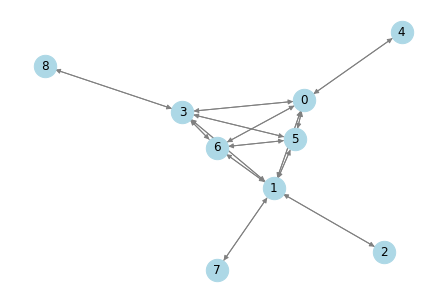

finish
[(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {})]


In [23]:
from sql import Sql,_global
import networkx as nx
import matplotlib.pyplot as plt
from core import database, Sql, Plan, load
import os
print(os.getcwd())
if __name__ == "__main__":
    # print(1)
    database.setup(dbname='imdbload', user='postgres', password='password', host='127.0.0.1', port='5432', cache=False)
    # 创建SQL实例
    sql_query = df['query'].values[68]
    sql_instance = Sql(sql_query)

    # 构建异构图
    g, data_dict, node_indexes,edge_list = sql_instance.to_hetero_graph_dgl()

    print('edge_list:',edge_list)
    # 打印图特征表示
    print("Graph Nodes:", g.nodes())
    print("Graph Edges:", g.edges())
    print("Node Features:", g.ndata)
    print("Edge Features:", g.edata)

    # 打印数据字典和节点索引
    print("Data Dictionary:", data_dict)
    print("Node Indexes:", node_indexes)

    nx_graph = g.to_networkx()

    # 使用 spring 布局绘制图形
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
    plt.savefig('./graph_output.png', format='png', dpi=300)
    plt.show()
    print('finish')
    print(nx_graph.nodes(data=True))

In [24]:
tree_builder.get_operator_vector()

{"((info)::text = ANY ('{Sweden,Norway,Germany,Denmark,Swedish,Denish,Norwegian,German,English}'::text[]))": tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0750e+00, 3.8847e+05,
          1.0000e+00, 4.0000e+00, 1.0750e+00, 0.0000e+00, 1.0000e+00]]),
 '(note IS NULL)': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [25]:
# def convert_to_text_comparison(cmp: str) -> str:
#     # 拆分表达式为列名和值
#     column, value = cmp.split('=')
    
#     # 去除多余的空格
#     column = column.strip()
#     value = value.strip()
    
#     # 检查并移除值两边的引号
#     if value.startswith("'") and value.endswith("'"):
#         value = value[1:-1]
    
#     # 生成新的表达式
#     new_expression = f"(({column})::text = '{value}'::text)"
    
#     return new_expression


for cmp in edge_list:
    if 'like' not in cmp[0] and has_text_expression(cmp[0]):
        print('cmp',cmp[0],convert_to_text_comparison(cmp[0]))

cmp cn.country_code <> '[pl]' ((country_code)::text <> '[pl]'::text)
cmp ct.kind = 'production companies' ((kind)::text = 'production companies'::text)
cmp k.keyword = 'sequel' ((keyword)::text = 'sequel'::text)


ValueError: The input string is not a valid comparison expression.

In [26]:
for cmp in edge_list:
    print(cmp[0])

cn.country_code <> '[pl]'
( cn.name like '%Film%' OR cn.name like '%Warner%')
ct.kind = 'production companies'
k.keyword = 'sequel'
lt.link like '%follow%'
mc.note IS NULL
mi.info IN ('Sweden',
'Norway',
'Germany',
'Denmark',
'Swedish',
'Denish',
'Norwegian',
'German',
'English')
t.production_year BETWEEN 1950 AND 2010
lt.id = ml.link_type_id
ml.movie_id = t.id
t.id = mk.movie_id
mk.keyword_id = k.id
t.id = mc.movie_id
mc.company_type_id = ct.id
mc.company_id = cn.id
mi.movie_id = t.id
ml.movie_id = mk.movie_id
ml.movie_id = mc.movie_id
mk.movie_id = mc.movie_id
ml.movie_id = mi.movie_id
mk.movie_id = mi.movie_id
mc.movie_id = mi.movie_id


In [14]:
['mi.movie_id = t.id', 'mi.movie_id = t.id', 'it2.id = mi.info_type_id', 'kt.id = t.kind_id', 'cn.id = mc.company_id', 'ct.id = mc.company_type_id', 'miidx.movie_id = t.id', 'it.id = miidx.info_type_id', 'mi.movie_id = miidx.movie_id', 'mi.movie_id = miidx.movie_id', 'mi.movie_id = mc.movie_id', 'miidx.movie_id = mc.movie_id']

['mi.movie_id = t.id',
 'mi.movie_id = t.id',
 'it2.id = mi.info_type_id',
 'kt.id = t.kind_id',
 'cn.id = mc.company_id',
 'ct.id = mc.company_type_id',
 'miidx.movie_id = t.id',
 'it.id = miidx.info_type_id',
 'mi.movie_id = miidx.movie_id',
 'mi.movie_id = miidx.movie_id',
 'mi.movie_id = mc.movie_id',
 'miidx.movie_id = mc.movie_id']

In [15]:
import re

def transform_sql_like_condition(sql_condition):
    # 匹配 `AND` 和 `OR`
    table_name=cmp.split('.')[0]
    conditions = re.split(r"(?i) AND | OR ", sql_condition)

    # 匹配连接条件中的逻辑操作符
    operators = re.findall(r"(?i) AND | OR ", sql_condition)

    # 转换每个 LIKE 条件为 Postgres 的格式
    transformed_clauses = [
        f"((title)::text ~~ {condition.split('like')[1].strip()}::text)"
        for condition in conditions
    ]
    print(table_name,transformed_clauses[0])
    return table_name,transformed_clauses[0]

# 示例用法
sql_condition = "cmp t.title like '%Champion%' AND t.title like '%Winner%' OR t.title like '%Loser%'"
transformed_sql = transform_sql_like_condition(sql_condition)
print(transformed_sql)


AttributeError: 'tuple' object has no attribute 'split'

In [25]:
def swap_join_condition(condition: str) -> str:
    '''防止同一个连接条件，左右连接条件不一样而无法识别'''
    # 找到等号的位置
    equal_index = condition.find('=')
    
    # 如果没有找到等号，返回原字符串
    if equal_index == -1:
        return condition
    
    # 拆分等号两边的条件，并去掉左右空格
    left_side = condition[:equal_index].strip()
    right_side = condition[equal_index + 1:].strip()
    
    # 交换等式两边的条件
    swapped_condition = f"{right_side} = {left_side}"
    
    return swapped_condition

tables=[]
operator_vectors_cmp1=[]
operator_vectors_cmp2=[]
for cmp,table_num in edge_list:
    for key in tree_builder.get_operator_vector():
        if table_num==1:
            if 'like' in cmp:
                table,cmp_in_op=transform_sql_like_condition(cmp)
            else:
                table,cmp_in_op=cmp.split('.')
            if cmp_in_op in key:
                tables.append(table)
                operator_vectors_cmp1.append(tree_builder.get_operator_vector()[key])
                print(cmp_in_op,key)
                print(tree_builder.get_operator_vector()[key])
        # print(key)
        if cmp in key or swap_join_condition(cmp) in key:
            print(cmp,key)
            operator_vectors_cmp2.append(tree_builder.get_operator_vector()[key])

( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
( t ((title)::text ~~ '%Champion%'::text)
it2.id = mi.info_type_id (mi.info_type_id = it2.id)
it.id = miidx.info_type_id (miidx.info_type_id = it.id)
mi.movie_id = miidx.movie_id (mi.movie_id = miidx.movie_id)
mi.movie_id = mc.movie_id (mc.movie_id = mi.movie_id)


In [11]:
operator_vectors_cmp2

[tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           9.7000e-01,  1.0000e+00,  5.7608e+07,  7.0000e+00, -5.5880e+07,
           4.4533e-02,  5.6248e-02]]),
 tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,

In [12]:
torch.cat(operator_vectors_cmp2, dim=0).shape

torch.Size([6, 47])

In [27]:
tree_builder.get_operator_vector()

{"((info)::text = 'release dates'::text)": tensor([[ 0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
           0.1250,  1.0000,  1.0000, 11.0000,  0.1250,  0.0000,  1.0000]]),
 '(mi.info_type_id = it2.id)': tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.00

In [14]:
table,cmp_in_op='d2.d_moy = 10'.split('.')
table,cmp_in_op

('d2', 'd_moy = 10')

In [15]:
for key in tree_builder.get_operator_vector():
    print(key)

((d_year = 1998) AND (d_moy = 10))
(store_returns.sr_returned_date_sk = d2.d_date_sk)
((store_sales.ss_ticket_number = store_returns.sr_ticket_number) AND (store_sales.ss_item_sk = store_returns.sr_item_sk) AND (store_sales.ss_customer_sk = store_returns.sr_customer_sk))
(d1.d_date_sk = store_sales.ss_sold_date_sk)
(store_sales.ss_store_sk = store.s_store_sk)


In [16]:
torch.zeros(0, 2, dtype=torch.long)

tensor([], size=(0, 2), dtype=torch.int64)

In [22]:
g.edges()

(tensor([4, 2, 4, 2, 4, 3, 2, 1, 4, 2, 4, 0]),
 tensor([2, 4, 2, 4, 3, 4, 1, 2, 2, 4, 0, 4]))

In [20]:
def swap_join_condition(condition: str) -> str:
    '''防止同一个连接条件，左右连接条件不一样而无法识别'''
    # 找到等号的位置
    equal_index = condition.find('=')
    
    # 如果没有找到等号，返回原字符串
    if equal_index == -1:
        return condition
    
    # 拆分等号两边的条件，并去掉左右空格
    left_side = condition[:equal_index].strip()
    right_side = condition[equal_index + 1:].strip()
    
    # 交换等式两边的条件
    swapped_condition = f"{right_side} = {left_side}"
    
    return swapped_condition

def dgl_node_and_edge_vectorization(sql_query,plan):
    sql_instance = Sql(sql_query)

    # 构建异构图
    g, data_dict, node_indexes,edge_list = sql_instance.to_hetero_graph_dgl()
    # 构建 node feature
    filter_features = g.ndata['filter']
    edge_features = g.ndata['edge']
    onehot_features = g.ndata['onehot']
    others_features = g.ndata['others'].view(g.ndata['filter'].shape[0], -1)

    # 假设两个特征的维度是相同的
    combined_features = torch.cat((filter_features,edge_features, onehot_features,others_features), dim=1)
    g.ndata['feature'] = combined_features
    
    # 构建 edge feature
    tree_builder = TreeBuilder()
    # 准备您的 SQL 执行计划数据，这里是一个示例
    execution_plan = ast.literal_eval(plan)[0]['Plan']

    # 特征化执行计划
    try:
        features = tree_builder.plan_to_feature_tree(execution_plan, current_height=0)
    except TreeBuilderError as e:
        print("Error while feature extraction:", e.__msg)
    # 提取对应operator vector
    operator_vector_dict=tree_builder.get_operator_vector()
    # 建立cmp与plan_operator的映射关系
    tables=[]
    operator_vectors_cmp1=[]
    operator_vectors_cmp2=[]
    for cmp,table_num in edge_list:
        for key in tree_builder.get_operator_vector():
            if table_num==1:
                table,cmp_in_op=cmp.split('.')
                if cmp_in_op in key:
                    tables.append(table)
                    operator_vectors_cmp1.append(tree_builder.get_operator_vector()[key])
            # print(key)
            elif cmp in key or swap_join_condition(cmp) in key:
                operator_vectors_cmp2.append(tree_builder.get_operator_vector()[key])
                operator_vectors_cmp2.append(tree_builder.get_operator_vector()[key])
    #合并每一条边的向量
    vector_cmp1=torch.cat(operator_vectors_cmp1, dim=0)
    vector_cmp2=torch.cat(operator_vectors_cmp2, dim=0)
    vector_edge=torch.cat((vector_cmp2, vector_cmp1), dim=0)
    #添加自环
    for t in tables:
        new_u = torch.tensor([node_indexes['~'+t]])  # 自环的起点
        new_v = torch.tensor([node_indexes['~'+t]])  # 自环的终点
        g.add_edges(new_u, new_v)
    g.edata['feature'] = vector_edge
    return g

In [26]:
for i in range(5000,5050):
    g=dgl_node_and_edge_vectorization(df['query'].values[i],df['query_plan_no_index'].values[i])

Found 'Filter' in key: Join Filter
(store_sales.ss_store_sk = store.s_store_sk)
Found 'Cond' in key: Hash Cond
(d1.d_date_sk = store_sales.ss_sold_date_sk)
Found 'Cond' in key: Hash Cond
((store_sales.ss_ticket_number = store_returns.sr_ticket_number) AND (store_sales.ss_item_sk = store_returns.sr_item_sk) AND (store_sales.ss_customer_sk = store_returns.sr_customer_sk))
Found 'Cond' in key: Hash Cond
(store_returns.sr_returned_date_sk = d2.d_date_sk)
Found 'Filter' in key: Filter
((d_year = 1998) AND (d_moy = 10))
torch.Size([15, 47]) (tensor([4, 2, 4, 2, 4, 3, 2, 1, 4, 2, 4, 0, 1, 1, 1]), tensor([2, 4, 2, 4, 3, 4, 1, 2, 2, 4, 0, 4, 1, 1, 1]))
Found 'Filter' in key: Join Filter
(store_sales.ss_store_sk = store.s_store_sk)
Found 'Cond' in key: Hash Cond
(d1.d_date_sk = store_sales.ss_sold_date_sk)
Found 'Cond' in key: Hash Cond
((store_sales.ss_ticket_number = store_returns.sr_ticket_number) AND (store_sales.ss_item_sk = store_returns.sr_item_sk) AND (store_sales.ss_customer_sk = store_

In [27]:
g

Graph(num_nodes=5, num_edges=15,
      ndata_schemes={'filter': Scheme(shape=(34,), dtype=torch.float32), 'filter_mask': Scheme(shape=(34,), dtype=torch.int64), 'edge': Scheme(shape=(34,), dtype=torch.float32), 'global': Scheme(shape=(1,), dtype=torch.int64), 'onehot': Scheme(shape=(25,), dtype=torch.float32), 'others': Scheme(shape=(34, 13), dtype=torch.float32), 'feature': Scheme(shape=(535,), dtype=torch.float32)}
      edata_schemes={'feature': Scheme(shape=(47,), dtype=torch.float32)})